In [2]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model

In [3]:
!pip install pillow
from PIL import Image

import matplotlib.pyplot as plt
import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
def plot_training_curves(history, title=None):
    ''' Plot the training curves for loss and accuracy given a model history
    '''
    # find the minimum loss epoch
    minimum = np.min(history.history['val_loss'])
    min_loc = np.where(minimum == history.history['val_loss'])[0]
    # get the vline y-min and y-max
    loss_min, loss_max = (min(history.history['val_loss'] + history.history['loss']),
                          max(history.history['val_loss'] + history.history['loss']))
    acc_min, acc_max = (min(history.history['val_accuracy'] + history.history['accuracy']),
                        max(history.history['val_accuracy'] + history.history['accuracy']))
    # create figure
    fig, ax = plt.subplots(ncols=2, figsize = (15,7))
    fig.suptitle(title)
    index = np.arange(1, len(history.history['accuracy']) + 1)
    # plot the loss and validation loss
    ax[0].plot(index, history.history['loss'], label = 'loss')
    ax[0].plot(index, history.history['val_loss'], label = 'val_loss')
    ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    # plot the accuracy and validation accuracy
    ax[1].plot(index, history.history['accuracy'], label = 'accuracy')
    ax[1].plot(index, history.history['val_accuracy'], label = 'val_accuracy')
    ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min_loss_location')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.show()

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
y_train.shape

(60000,)

In [7]:
train_data = x_train/255
test_data = x_test/255

In [8]:
# reshape to add color channel
train_data = train_data.reshape(train_data.shape + (1,))
test_data = test_data.reshape(test_data.shape + (1,))


In [9]:
num_classes=10
filters=32
pool_size=2
kernel_size=3
dropout=0.2
input_shape = (28,28,1)

model = Sequential([
      # convolutional feature extraction
      # ConvNet 1
      keras.layers.Conv2D(filters, kernel_size, padding = 'valid',
              activation='relu',
              input_shape=input_shape),
      keras.layers.MaxPooling2D(pool_size=pool_size),

      # ConvNet 2
      keras.layers.Conv2D(filters, kernel_size,
              padding = 'valid',
              activation='relu'),
      keras.layers.MaxPooling2D(pool_size=pool_size),

      # classification 
      # will retrain from here
      keras.layers.Flatten(name='flatten'),

      keras.layers.Dropout(dropout),
      keras.layers.Dense(128, activation='relu'),
      
      keras.layers.Dropout(dropout, name='penult'),
      keras.layers.Dense(num_classes, activation='softmax', name='last')
  ])

es = keras.callbacks.EarlyStopping(min_delta=0.001, patience=2)

model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam', #sgd, nadam, adam, rmsprop
                      metrics=['accuracy'])

history = model.fit(train_data, y_train,
                    validation_data=(test_data, y_test),
                    batch_size=32,
                    epochs=1000,
                    callbacks=[es])

Epoch 1/1000
1875/1875 [==============================] - 24s 4ms/step - loss: 0.3978 - accuracy: 0.8721 - val_loss: 0.0499 - val_accuracy: 0.9827
Epoch 2/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.0379 - val_accuracy: 0.9880
Epoch 3/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 4/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 5/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0248 - val_accuracy: 0.9919
Epoch 6/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0239 - val_accuracy: 0.9919
Epoch 7/1000
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0243 

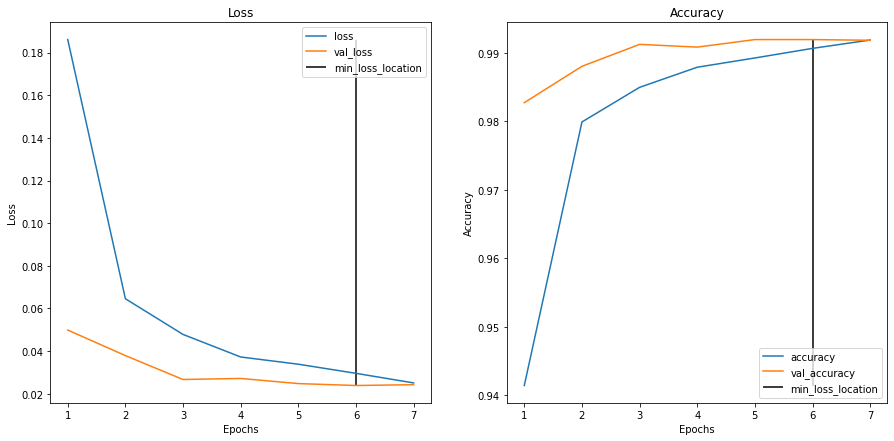

In [10]:
plot_training_curves(history=history)

In [11]:
letters_A = glob.glob('/content/drive/MyDrive/Train/A/*')
letters_B = glob.glob('/content/drive/MyDrive/Train/B/*')
letters_C = glob.glob('/content/drive/MyDrive/Train/C/*')
letters_D = glob.glob('/content/drive/MyDrive/Train/D/*')
letters_E = glob.glob('/content/drive/MyDrive/Train/E/*')

In [12]:
letters_A[:31]

['/content/drive/MyDrive/Train/A/AmeetA1.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA2.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA3.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA4.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA5.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA6.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA7.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA8.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA9.jpg',
 '/content/drive/MyDrive/Train/A/AmeetA10.jpg',
 '/content/drive/MyDrive/Train/A/KathyPicsA1.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA1.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA2.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA3.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA4.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA5.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA6.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA7.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA10.jpg',
 '/content/drive/MyDrive/Train/A/DadPicsA9.jpg',
 '/content/drive/MyDrive/Train/A/Dad

In [13]:
A_images = []
B_images = []
C_images = []
D_images = []
E_images = []
size = (28,28)
for im in letters_A[:31]:
  im = Image.open(im).convert("L").resize(size)
  A_images.append(np.array(im))

for im in letters_B[:31]:
  im = Image.open(im).convert("L").resize(size)
  B_images.append(np.array(im))

for im in letters_C[:31]:
  im = Image.open(im).convert("L").resize(size)
  C_images.append(np.array(im))

for im in letters_D[:31]:
  im = Image.open(im).convert("L").resize(size)
  D_images.append(np.array(im))

for im in letters_E[:31]:
  im = Image.open(im).convert("L").resize(size)
  E_images.append(np.array(im))  

In [14]:
A_train = np.stack(A_images)
B_train = np.stack(B_images)
C_train = np.stack(C_images)
D_train = np.stack(D_images)
E_train = np.stack(E_images)

In [15]:
print(B_train.shape)
print(C_train.shape)
print(D_train.shape)
print(E_train.shape)

(31, 28, 28)
(31, 28, 28)
(31, 28, 28)
(31, 28, 28)


In [16]:
X_data1 = np.append(A_train,B_train,axis=0)

In [17]:
X_data1 = np.append(X_data1,C_train,axis=0)

In [18]:
X_data1 = np.append(X_data1,D_train,axis=0)

In [19]:
X_data1 = np.append(X_data1,E_train,axis=0)

In [20]:
X_data1.shape

(155, 28, 28)

In [21]:
X_data1 = X_data1.reshape((155,28,28,1))
X_data1.shape

(155, 28, 28, 1)

In [22]:
A_label = np.full((31,),0)
B_label = np.full((31,),1)
C_label = np.full((31,),2)
D_label = np.full((31,),3)
E_label = np.full((31,),4)

In [23]:
y_data1 = np.append(A_label,[B_label,C_label,D_label,E_label])

In [24]:
y_data1.shape

(155,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data1,y_data1,test_size = .25,random_state = 1776)

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
layer_trainable = False
for layer in model.layers:
  layer.trainable = layer_trainable
  if layer.name == 'flatten':
    layer_trainable = True

print(f"{'Layer Name':17} {'Is Trainable?'}")
for layer in model.layers:
  print(f"{layer.name:17} {layer.trainable}")

Layer Name        Is Trainable?
conv2d            False
max_pooling2d     False
conv2d_1          False
max_pooling2d_1   False
flatten           False
dropout           True
dense             True
penult            True
last              True


In [28]:
penult_layer = model.get_layer(name='penult')

output_layer = keras.layers.Dense(5, activation='softmax')(penult_layer.output)

new_model = Model(model.input, output_layer)

In [29]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout (Dropout)            (None, 800)               0     

In [30]:
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

new_model_hist = new_model.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              batch_size=32,
                              epochs=1000,
                              callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 80ms/step - loss: 2.3907 - accuracy: 0.1017 - val_loss: 2.1870 - val_accuracy: 0.0769
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.8595 - accuracy: 0.2236 - val_loss: 1.8186 - val_accuracy: 0.2308
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.3378 - accuracy: 0.4539 - val_loss: 1.5136 - val_accuracy: 0.3077
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0835 - accuracy: 0.5830 - val_loss: 1.2615 - val_accuracy: 0.4872
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.8948 - accuracy: 0.7205 - val_loss: 1.0395 - val_accuracy: 0.6410
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7640 - accuracy: 0.7146 - val_loss: 0.8498 - val_accuracy: 0.7692
Epoch 7/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.5749 - accuracy: 0.8754 - val_loss: 0.7095 - val_accuracy: 0.8205
Epoch 8/1000


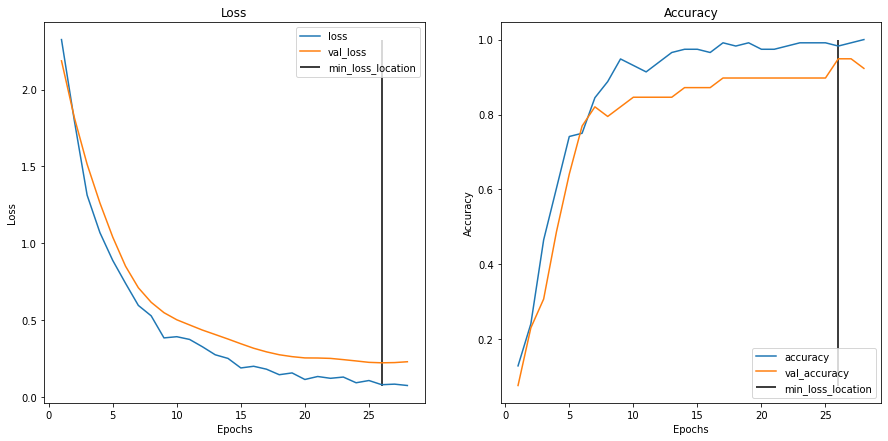

In [31]:
plot_training_curves(history=new_model_hist)